In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


d:\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
d:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

data=pd.read_csv('./neo_v2.csv')
data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [3]:
data=pd.read_csv('./neo_v2.csv')
data.drop(["id","name","orbiting_body","sentry_object"], axis=1, inplace=True)

## Unbalanced dataset

Y Shape (90836,)


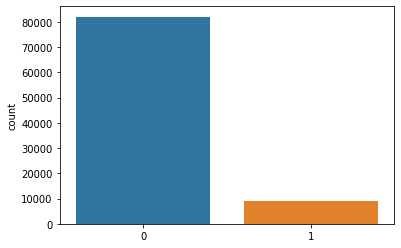

False    81996
True      8840
Name: hazardous, dtype: int64

In [4]:
y=data["hazardous"]
print("Y Shape",y.shape)
label=LabelEncoder()
y=label.fit_transform(y)
sns.countplot(x = y)
plt.show()
data['hazardous'].value_counts()

In [5]:
data=data.sort_values('hazardous')
data
new_dataset_false=data[0:8000]
new_dataset_true = data[82000:82000+8000]
nd = pd.concat([new_dataset_false,new_dataset_true])
processed_dataset = shuffle(nd)


In [6]:
x=processed_dataset.iloc[:,0:5]
print("X Shape",x.shape)
y=processed_dataset["hazardous"]
print("Y Shape",y.shape)
label=LabelEncoder()
y=label.fit_transform(y)

X Shape (16000, 5)
Y Shape (16000,)


## Balanced dataset 

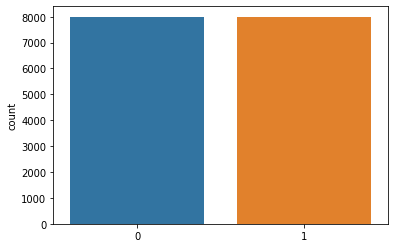

False    8000
True     8000
Name: hazardous, dtype: int64

In [7]:
sns.countplot(x = y)
plt.show()
processed_dataset['hazardous'].value_counts()

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(11200, 5)
(4800, 5)


Train set bifurcation
False 5572
True 5628


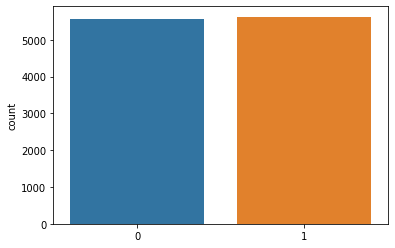

Test set bifurcation
False 2428
True 2372


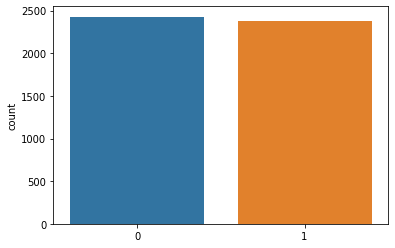

In [9]:
test_set_sparse = Counter(y_test)
train_set_sparse = Counter(y_train)

print("Train set bifurcation")
print("False",train_set_sparse[0])
print("True",train_set_sparse[1])
sns.countplot(x = y_train)
plt.show()
print("Test set bifurcation")
print("False",test_set_sparse[0])
print("True",test_set_sparse[1])
sns.countplot(x = y_test)
plt.show()

## Writing it to X_train_neo.csv X_test_neon.csv Y_train_neo.csv Y_test_neo.csv

In [11]:
with open("X_TRAIN_NEO.csv",'w') as f:
  for x in x_train:
    strin =""
    for y in x:
      strin+=str(y)+" "
    line = str(strin)+"\n"
    f.write(line)

with open("X_TEST_NEO.csv",'w') as f:
  for x in x_test:
    strin =""
    for y in x:
      strin+=str(y)+" "
    line = str(strin)+"\n"
    f.write(line)


In [12]:
with open("Y_TRAIN_NEO.csv",'w') as f:
  for x in y_train:
    line = str(x)+"\n"
    f.write(line)

with open("Y_TEST_NEO.csv",'w') as f:
  for x in y_test:
    line = str(x)+"\n"
    f.write(line)

In [13]:
print("Samples generated sucessfully")
print("Train Size 11200")
print("Test Size 4800")

Samples generated sucessfully
Train Size 11200
Test Size 4800
